# Homework Assignment #1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Section 1: Police Killings

In [2]:
killings = pd.read_csv('C:\Users\david.becker\Desktop\python\DS-SF-41\data\police-killings.csv', index_col=[0])
killings.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


### 1. Make the following changes to column names:

- Rename "lawenforcementagency" to "agency"
- Rename "raceethnicity" to "race"

In [3]:
killings.rename(index=str, columns={"lawenforcementagency": "agency", "raceethnicity": "race"},inplace=True)

### 2. Show the count of missing values in each column

In [4]:
killings.isnull().sum()

name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

### 3. Replace each null/missing value in the dataframe with the string "unknown"

In [5]:
killings.streetaddress.fillna("unknown",inplace=True)

### 4. How many killings were there in March and April?

In [6]:
killings.month.str.contains('March').value_counts()+killings.month.str.contains('April').value_counts()

False    724
True     210
Name: month, dtype: int64

### 5. How many male and how many female victims are there?

In [7]:
killings.groupby('gender').size()

gender
Female     22
Male      445
dtype: int64

### 6. How many killings were of unarmed people?

In [53]:
killings.armed.str.contains('No').value_counts()

False    351
True     116
Name: armed, dtype: int64

### 7. What percentage of all killings were unarmed?

In [9]:
killings.armed.str.contains('No').value_counts(normalize=True)

False    0.751606
True     0.248394
Name: armed, dtype: float64

### 8. What are the 5 states with the most killings?

In [32]:
killings_state=killings.groupby('state').size()
killings_state.sort_values(ascending=False).head(5)

state
CA    74
TX    46
FL    29
AZ    25
OK    22
dtype: int64

### 9. Show a value counts of deaths for each race

In [33]:
killings.groupby('race').size()

race
Asian/Pacific Islander     10
Black                     135
Hispanic/Latino            67
Native American             4
Unknown                    15
White                     236
dtype: int64

### 10. Display a histogram of ages of all killings

(array([  58.,   98.,  114.,   76.,   51.,   36.,   21.,    7.,    4.,    2.]),
 array([ 16. ,  23.1,  30.2,  37.3,  44.4,  51.5,  58.6,  65.7,  72.8,
         79.9,  87. ]),
 <a list of 10 Patch objects>)

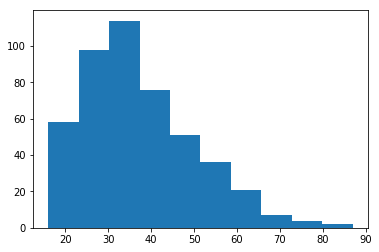

In [34]:
plt.hist(killings.age)

### 11. Show histogram of ages for each race

([array([  47.,  113.,  168.,  106.,    0.,    6.,   21.,    1.,    5.,    0.]),
  array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  467.])],
 array([  0. ,   6.5,  13. ,  19.5,  26. ,  32.5,  39. ,  45.5,  52. ,
         58.5,  65. ]),
 <a list of 2 Lists of Patches objects>)

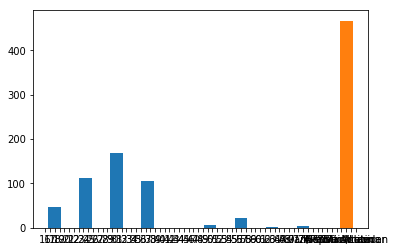

In [66]:
plt.hist(killings[['age','race']])


### 12. What is the average age of death by race?

In [52]:
killings.groupby('race').age.mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

### 13. Show a bar chart with counts of deaths every month

<Container object of 6 artists>

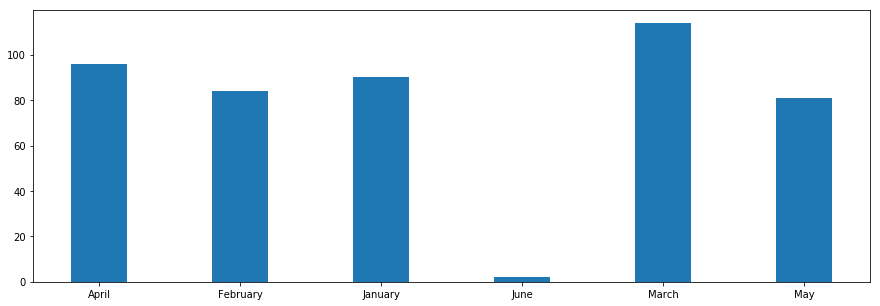

In [109]:
month_deaths=killings.groupby('month').size()
pos=np.arange(month_deaths.size)
plt.figure(figsize=(15,5))
w=0.4
plt.bar(left=pos,width=w,height=month_deaths,tick_label=month_deaths.index,align="center")

## Section 2: College Majors

In [4]:
majors = pd.read_csv('C:\Users\david.becker\Desktop\python\DS-SF-41\data\college-majors.csv', index_col=[0])
majors.head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


### 1. Delete the columns (employed_full_time_year_round, major_code)


In [6]:
majors.drop('Employed_full_time_year_round', axis=1, inplace=True)
majors.drop('Major_code', axis=1, inplace=True)
majors.head()

,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0
1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0
2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0
3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0
4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0


### 2. Show the count of missing values in each column

In [7]:
majors.isnull().sum()

Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

### 3. What are the top 10 highest paying majors?

In [11]:
top=majors.sort_values('Median',ascending=False).head(10)
top_median=top[['Major','Median']]
top_median.head()

,Major,Median
59,PETROLEUM ENGINEERING,125000
154,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,106000
57,NAVAL ARCHITECTURE AND MARINE ENGINEERING,97000
55,METALLURGICAL ENGINEERING,96000
58,NUCLEAR ENGINEERING,95000


### 4. Plot the data from the last question in a bar chart, include proper title, and labels


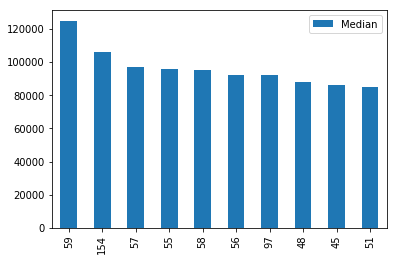

In [12]:
top_median.plot.bar()

### 5. What is the average median salary for each major category?

In [17]:
major_cat=majors.groupby('Major_category').Median.mean()
major_cat.head(50)

Major_category
Agriculture & Natural Resources        55000.000000
Arts                                   43525.000000
Biology & Life Science                 50821.428571
Business                               60615.384615
Communications & Journalism            49500.000000
Computers & Mathematics                66272.727273
Education                              43831.250000
Engineering                            77758.620690
Health                                 56458.333333
Humanities & Liberal Arts              46080.000000
Industrial Arts & Consumer Services    52642.857143
Interdisciplinary                      43000.000000
Law & Public Policy                    52800.000000
Physical Sciences                      62400.000000
Psychology & Social Work               44555.555556
Social Science                         53222.222222
Name: Median, dtype: float64

### 6. Visualize only the top 5 paying major categories

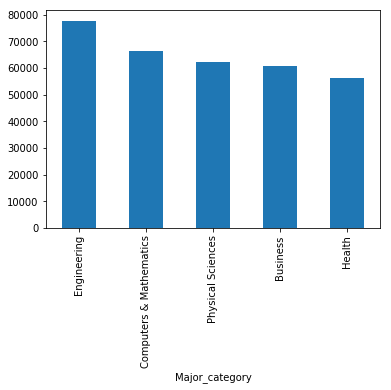

In [14]:
major_cat_5=major_cat.sort_values(ascending=False).head(5)
major_cat_5.head()
major_cat_5.plot.bar()

### 7. Plot a histogram of the distribution of median salaries

(array([ 25.,  61.,  32.,  31.,  10.,   7.,   5.,   1.,   0.,   1.]),
 array([  35000.,   44000.,   53000.,   62000.,   71000.,   80000.,
          89000.,   98000.,  107000.,  116000.,  125000.]),
 <a list of 10 Patch objects>)

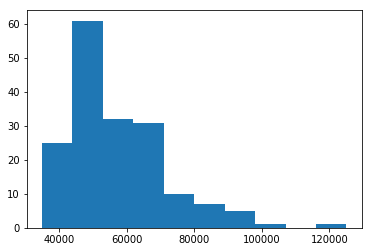

In [15]:
plt.hist(majors.Median)

### 8. Plot a histogram of the distribution of median salaries by major category

(array([ 5.,  1.,  4.,  2.,  0.,  2.,  1.,  0.,  0.,  1.]),
 array([ 43000.        ,  46475.86206897,  49951.72413793,  53427.5862069 ,
         56903.44827586,  60379.31034483,  63855.17241379,  67331.03448276,
         70806.89655172,  74282.75862069,  77758.62068966]),
 <a list of 10 Patch objects>)

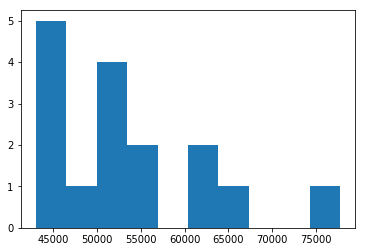

In [20]:
plt.hist(major_cat)

### 9. What are the top 10 most UNemployed majors?

In [21]:
majors.sort_values('Unemployed',ascending=False).head(10)


,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
161,BUSINESS MANAGEMENT AND ADMINISTRATION,Business,3123510,2354398,147261,0.058865,58000,39500,86000.0
158,GENERAL BUSINESS,Business,2148712,1580978,85626,0.051378,60000,40000,95000.0
114,PSYCHOLOGY,Psychology & Social Work,1484075,1055854,79066,0.069667,45000,31000,68000.0
159,ACCOUNTING,Business,1779219,1335825,75379,0.053415,65000,42500,100000.0
13,COMMUNICATIONS,Communications & Journalism,987676,790696,54390,0.064360,50000,35000,80000.0
73,ENGLISH LANGUAGE AND LITERATURE,Humanities & Liberal Arts,1098647,708882,52248,0.068645,50000,32900,75000.0
164,MARKETING AND MARKETING RESEARCH,Business,1114624,890125,51839,0.055033,56000,38500,90000.0
132,POLITICAL SCIENCE AND GOVERNMENT,Social Science,748956,541630,40376,0.069374,58000,38000,90000.0
25,GENERAL EDUCATION,Education,1438867,843693,38742,0.043904,43000,32000,59000.0
78,BIOLOGY,Biology & Life Science,839454,583079,36757,0.059301,51000,35000,80000.0


### 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category

In [24]:
unemp_cat=majors.groupby('Major_category').Unemployed.mean()
unemp_cat.sort_values(ascending=False).head(10)

Major_category
Business                       33415.153846
Communications & Journalism    25299.750000
Social Science                 14683.333333
Arts                           13015.625000
Humanities & Liberal Arts      11942.400000
Psychology & Social Work       11578.444444
Law & Public Policy             8609.800000
Education                       7833.500000
Computers & Mathematics         7270.363636
Health                          6251.083333
Name: Unemployed, dtype: float64

## Section 3: FIFA Soccer Game data

In [62]:
fifa = pd.read_csv(r'C:\Users\david.becker\Desktop\python\DS-SF-41\data\fifa_data.csv')
fifa.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


### 1. Clean up the dataset.

    - Lowercase the column names
    - Set the "name" column as the index
    - Drop the following columns "national_position", "national_kit", "club_kit", "club_joining", and "contract_expiry"
    - Get rid of all players who are goalkeepers and drop every column that starts with GK
    - Drop every player whose rating is less than 70
    - Convert the "height" and "weight" columns to float types
    - Check to see if there any nulls, if so drop them from the dataset

In [63]:
fifa.drop(['National_Position', 'National_Kit', 'Club_Kit', 'Club_Joining', 'Contract_Expiry'], axis=1, inplace=True)
fifa.columns = map(str.lower, fifa.columns)
fifa.set_index('name', inplace=True)


fifa.head()

,nationality,club,club_position,rating,height,weight,preffered_foot,birth_date,age,preffered_position,...,long_shots,curve,freekick_accuracy,penalties,volleys,gk_positioning,gk_diving,gk_kicking,gk_handling,gk_reflexes
name,,,,,,,,,,,,,,,,,,,,,
Cristiano Ronaldo,Portugal,Real Madrid,LW,94,185 cm,80 kg,Right,02/05/1985,32,LW/ST,...,90,81,76,85,88,14,7,15,11,11
Lionel Messi,Argentina,FC Barcelona,RW,93,170 cm,72 kg,Left,06/24/1987,29,RW,...,88,89,90,74,85,14,6,15,11,8
Neymar,Brazil,FC Barcelona,LW,92,174 cm,68 kg,Right,02/05/1992,25,LW,...,77,79,84,81,83,15,9,15,9,11
Luis Suárez,Uruguay,FC Barcelona,ST,92,182 cm,85 kg,Right,01/24/1987,30,ST,...,86,86,84,85,88,33,27,31,25,37
Manuel Neuer,Germany,FC Bayern,GK,92,193 cm,92 kg,Right,03/27/1986,31,GK,...,16,14,11,47,11,91,89,95,90,89


### 2.  Who are the top five players of the following attributes: speed, marking, and finishing

In [71]:
fifa.sort_values('speed',ascending=False)
fifa.speed.head(5)

fifa.sort_values('marking',ascending=False)
fifa.marking.head(5)

fifa.sort_values('finishing',ascending=False)
fifa.finishing.head(5)

name
Cristiano Ronaldo    93
Lionel Messi         95
Neymar               89
Luis Suárez          94
Manuel Neuer         13
Name: finishing, dtype: int64

### 3. Who is the tallest French lefted foot player?

In [95]:
tall_FL=fifa.height[(fifa.nationality=='France') & (fifa.preffered_foot=='Left')]
tall_FL.sort_values(ascending=False).head(1)

name
Lucas Mocio    197 cm
Name: height, dtype: object

### 4. Show a pandas series of every attribute's correlation with the rating attribute

### 5. Make a heatmap of the dataset's correlation table

### 6. Return a dataframe with only players from the following clubs. Call the dataframe fifa2. From now on we'll be using fifa2

In [ ]:
clubs_list = ['Real Madrid', 'FC Barcelona', 'FC Bayern', 'Manchester Utd',
              'Chelsea', 'Arsenal', 'Juventus', 'PSG', 'Manchester City',
              'Bor. Dortmund', 'Liverpool', 'Roma']

In [106]:
fifa2=fifa[fifa.club==['Real Madrid'|'FC Barcelona'|'FC Bayern'|'Manchester Utd'|'Chelsea'|'Arsenal'|'Juventus'|'PSG'|'Manchester City'|'Bor. Dortmund'|'Liverpool'|'Roma']]
fifa2.head()

TypeError: unsupported operand type(s) for |: 'str' and 'str'

### 7. Make a bar plot of the average long_shots, curve, and dribbling attributes of the clubs in the data

### 8. Make a scatter plot of short_pass vs marking and use the preffered_foot column to color-encode the dots.